In [19]:
import numpy as np
import json, os
## import spearmanr
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_mutual_info_score, v_measure_score, adjusted_rand_score

In [2]:
## ambiguity load
with open("./sampling/key_to_ambiguity.json", "r") as f:
	key_to_ambiguity = json.load(f)

with open("./sampling/sampled_datasets_training.json", "r") as f:
	sampled_datasets_training = json.load(f)

for dataset in sampled_datasets_training:

	del key_to_ambiguity[dataset + ".npy"]



keys = list(key_to_ambiguity.keys())
ambiguities = np.array(list(key_to_ambiguity.values()))

In [3]:
## study result load

study_result = []
for part in os.listdir("./pilot_result/"):

	if part[-5:] == ".json":
		with open(f"./pilot_result/{part}", "r") as f:
			study_result.append(json.load(f))


In [4]:
## user-selected ambiguity
user_selected_ambiguity = np.zeros(len(keys))
for result in study_result:
	for i, key in enumerate(keys):
		if result["ambiguity"][key] == "amb":
			user_selected_ambiguity[i] += 1
		elif result["ambiguity"][key] == "unclear":
			user_selected_ambiguity[i] += 0
		elif result["ambiguity"][key] == "not_emb":
			user_selected_ambiguity[i] -=1

user_selected_ambiguity /= len(study_result)

print(f"User-selected ambiguity: {user_selected_ambiguity}")
print(f"True ambiguity: {ambiguities}")

User-selected ambiguity: [ 0.75  0.25  0.75 -1.   -0.25  0.75 -0.5  -0.5   0.5  -0.25  0.25  0.
 -0.25  1.   -0.5   0.   -0.25  0.75 -0.5   0.25 -0.5   0.5   0.25 -0.5
 -1.    0.75  0.75  0.75 -0.25  0.25  1.   -0.5   0.5   0.   -0.5  -0.5
 -0.25 -0.25  0.25  0.25  0.5  -1.    0.   -0.5  -0.75  0.5  -0.5  -0.75
 -0.75 -0.5  -1.   -0.5   0.5  -0.75  0.75 -0.25 -0.75 -0.25 -0.75  0.5 ]
True ambiguity: [0.99234854 0.60574752 0.40364154 0.07799463 0.66643139 0.38397435
 0.6003672  0.61960521 0.74792177 0.27720671 0.5883924  0.49439848
 0.37139514 0.43686553 0.50038344 0.48746622 0.58768557 0.28997135
 0.33691837 0.73848069 0.27761319 0.38493709 0.45505529 0.25768253
 0.21067107 0.39206448 0.40503584 0.37061197 0.21662641 0.34213579
 0.48873527 0.32739775 0.52004963 0.4134817  0.19936464 0.57263422
 0.32973745 0.34916045 0.43738458 0.76852967 0.45530829 0.21787066
 0.21648879 0.22286515 0.3147743  0.43850514 0.32228917 0.14963838
 0.28120237 0.26403637 0.27642686 0.24649348 0.44568185 0.250

In [25]:
ami_ambiguity_list = []
arand_ambiguity_list = []
v_measure_score_list = []

for key in keys:
	labels = []
	for result in study_result:
		lasso_result = result["lassoResult"][key]
		label = ["-1"] * len(lasso_result["0"])
		for brushIdx in lasso_result:
			brush = lasso_result[brushIdx]
			for i, point in enumerate(brush):
				if point == True:
					if label[i] == "-1":
						label[i] = brushIdx
					else:
						label[i] += "_" + brushIdx

		labels.append(label)
	
	curr_ami = []
	curr_arand = []
	curr_vm = []
	for i_idx in range(len(labels)):
		for j_idx in range(i_idx+1, len(labels)):
			curr_ami.append(1 - adjusted_mutual_info_score(labels[i_idx], labels[j_idx]))
			curr_arand.append(1 - adjusted_rand_score(labels[i_idx], labels[j_idx]))
			curr_vm.append(1 - v_measure_score(labels[i_idx], labels[j_idx]))
	
	ami_ambiguity_list.append(np.mean(curr_ami))
	arand_ambiguity_list.append(np.mean(curr_arand))
	v_measure_score_list.append(np.mean(curr_vm))



SpearmanrResult(correlation=0.5507283947780811, pvalue=5.133325600198622e-06)
SpearmanrResult(correlation=0.636065573770492, pvalue=4.7277868888919626e-08)
SpearmanrResult(correlation=0.6413448180050014, pvalue=3.3718778082468293e-08)
----------
SpearmanrResult(correlation=0.6687797227100704, pvalue=5.217875483009867e-09)


Text(0, 0.5, 'V-measure score based ambiguity')

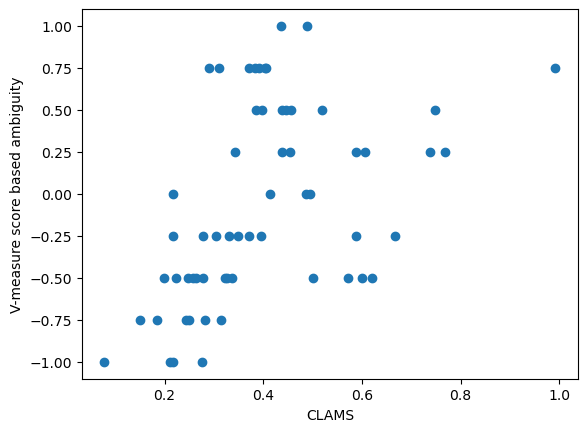

In [35]:
print(spearmanr(ambiguities, user_selected_ambiguity))
print(spearmanr(ambiguities, ami_ambiguity_list))
print(spearmanr(ambiguities, v_measure_score_list))
print("----------")
print(spearmanr(user_selected_ambiguity, ami_ambiguity_list))

plt.scatter(ambiguities, user_selected_ambiguity)
plt.xlabel("CLAMS")
plt.ylabel("V-measure score based ambiguity")



In [44]:
ambiguities.sort()

fake = [-1] * 39 + [0] * 3 + [1] * 18

spearmanr(ambiguities, fake)

SpearmanrResult(correlation=0.8357296286632528, pvalue=9.882943907375193e-17)